# plot maps of stratification change

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools
import proc_cesm_le

### read the CESM-LE data

In [2]:
%%time
tr85 = proc_cesm_le.open_ens('tr85','ann_dft_tanm',['PD'],isel={'time':-1})
baseline = proc_cesm_le.open_ens('tr85','ann_dft_tavg_1920-1939',['PD'])

tr85['PD'] = (tr85.PD - 1.) * 1000.
baseline['PD'] = (baseline.PD - 1.) * 1000.

print tr85
print baseline

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    PD        (ens, z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    U

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    PD        (ens, z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float6

In [3]:
%%time
tr85a = tr85.mean(dim='ens')
baseline = baseline.mean(dim='ens')
tr85a = tr85a.compute()
baseline = baseline.compute()
print tr85a
print baseline

/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    PD        (z_t, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat,

In [4]:
zwgt_u = tr85.dz.sel(z_t=slice(0,50e2)) / tr85.dz.sel(z_t=slice(0,50e2)).sum()
print zwgt_u
print zwgt_u.values.sum()

<xarray.DataArray 'dz' (z_t: 5)>
dask.array<div, shape=(5,), dtype=float64, chunksize=(5,)>
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03
1.0


In [5]:
zwgt_l = tr85.dz.sel(z_t=slice(100e2,200e2)) / tr85.dz.sel(z_t=slice(100e2,200e2)).sum()
print zwgt_l
print zwgt_l.values.sum()

<xarray.DataArray 'dz' (z_t: 10)>
dask.array<div, shape=(10,), dtype=float64, chunksize=(10,)>
Coordinates:
  * z_t      (z_t) float64 1.05e+04 1.15e+04 1.25e+04 1.35e+04 1.45e+04 ...
1.0


In [6]:
%%time
uld = []
for i,ds in enumerate([baseline,tr85a]):
    u = (ds.sel(z_t=slice(0,50e2))*zwgt_u).sum(dim='z_t')
    l = (ds.sel(z_t=slice(100e2,200e2))*zwgt_l).sum(dim='z_t')
    dsi = (l - u) 
    if i == 0:
        dsi['PD'] = dsi.PD.where(dsi.PD > 0.)
    else:        
        dsi['PD'] = dsi.PD.where(np.abs(dsi.PD) < 10.)        
    uld.append(dsi)    
print uld

[<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    PD        (nlat, nlon) float64 nan nan nan nan nan nan nan nan nan nan ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 -0.001953 -0.001953 -0.001953 0.0 0.0 ...
    TLAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TLONG     (nlat, nlon) float64 5.684e-14 -5.684e-14 -5.684e-14 ...
    UAREA     (nlat, nlon) float64 -0.001953 -0.001953 -0.001953 -0.001953 ...
    ULAT      (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    ULONG     (nlat, nlon) float64 -5.684e-14 0.0 0.0 -5.684e-14 -1.137e-13 ...
    dz        float64 37.96
    year      float64 -2.274e-13, <xarray.D

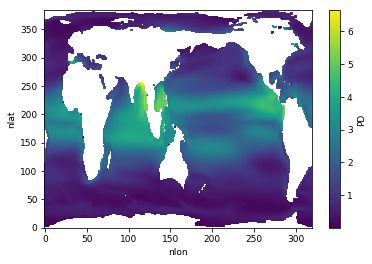

In [7]:
uld[0].PD.plot()

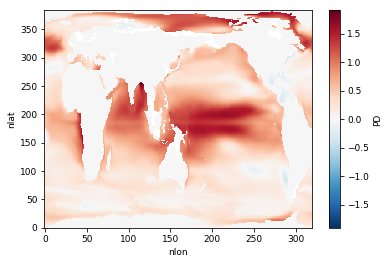

In [8]:
uld[1].PD.plot()

In [9]:
Z = [[]]*2
lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = uld[0].PD.values
lon,lat,Z[0]= plot_tools.adjust_pop_grid(lon,lat,field)

lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = uld[1].PD.values
lon,lat,Z[1]= plot_tools.adjust_pop_grid(lon,lat,field)

for z in Z:
    print z.shape
print lon.shape
print lat.shape

(384, 321)
(384, 321)
(384, 321)
(384, 321)


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


initial plot size (display units): 6.98,3.54
Adjusting fig size:
	(W,H in): 10.00,4.00 --> 8.03,6.73
new plot size: 5.61,3.57


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


IllegalArgumentException: Invalid number of points in LinearRing found 3 - must be 0 or >= 4


Shell is not a LinearRing


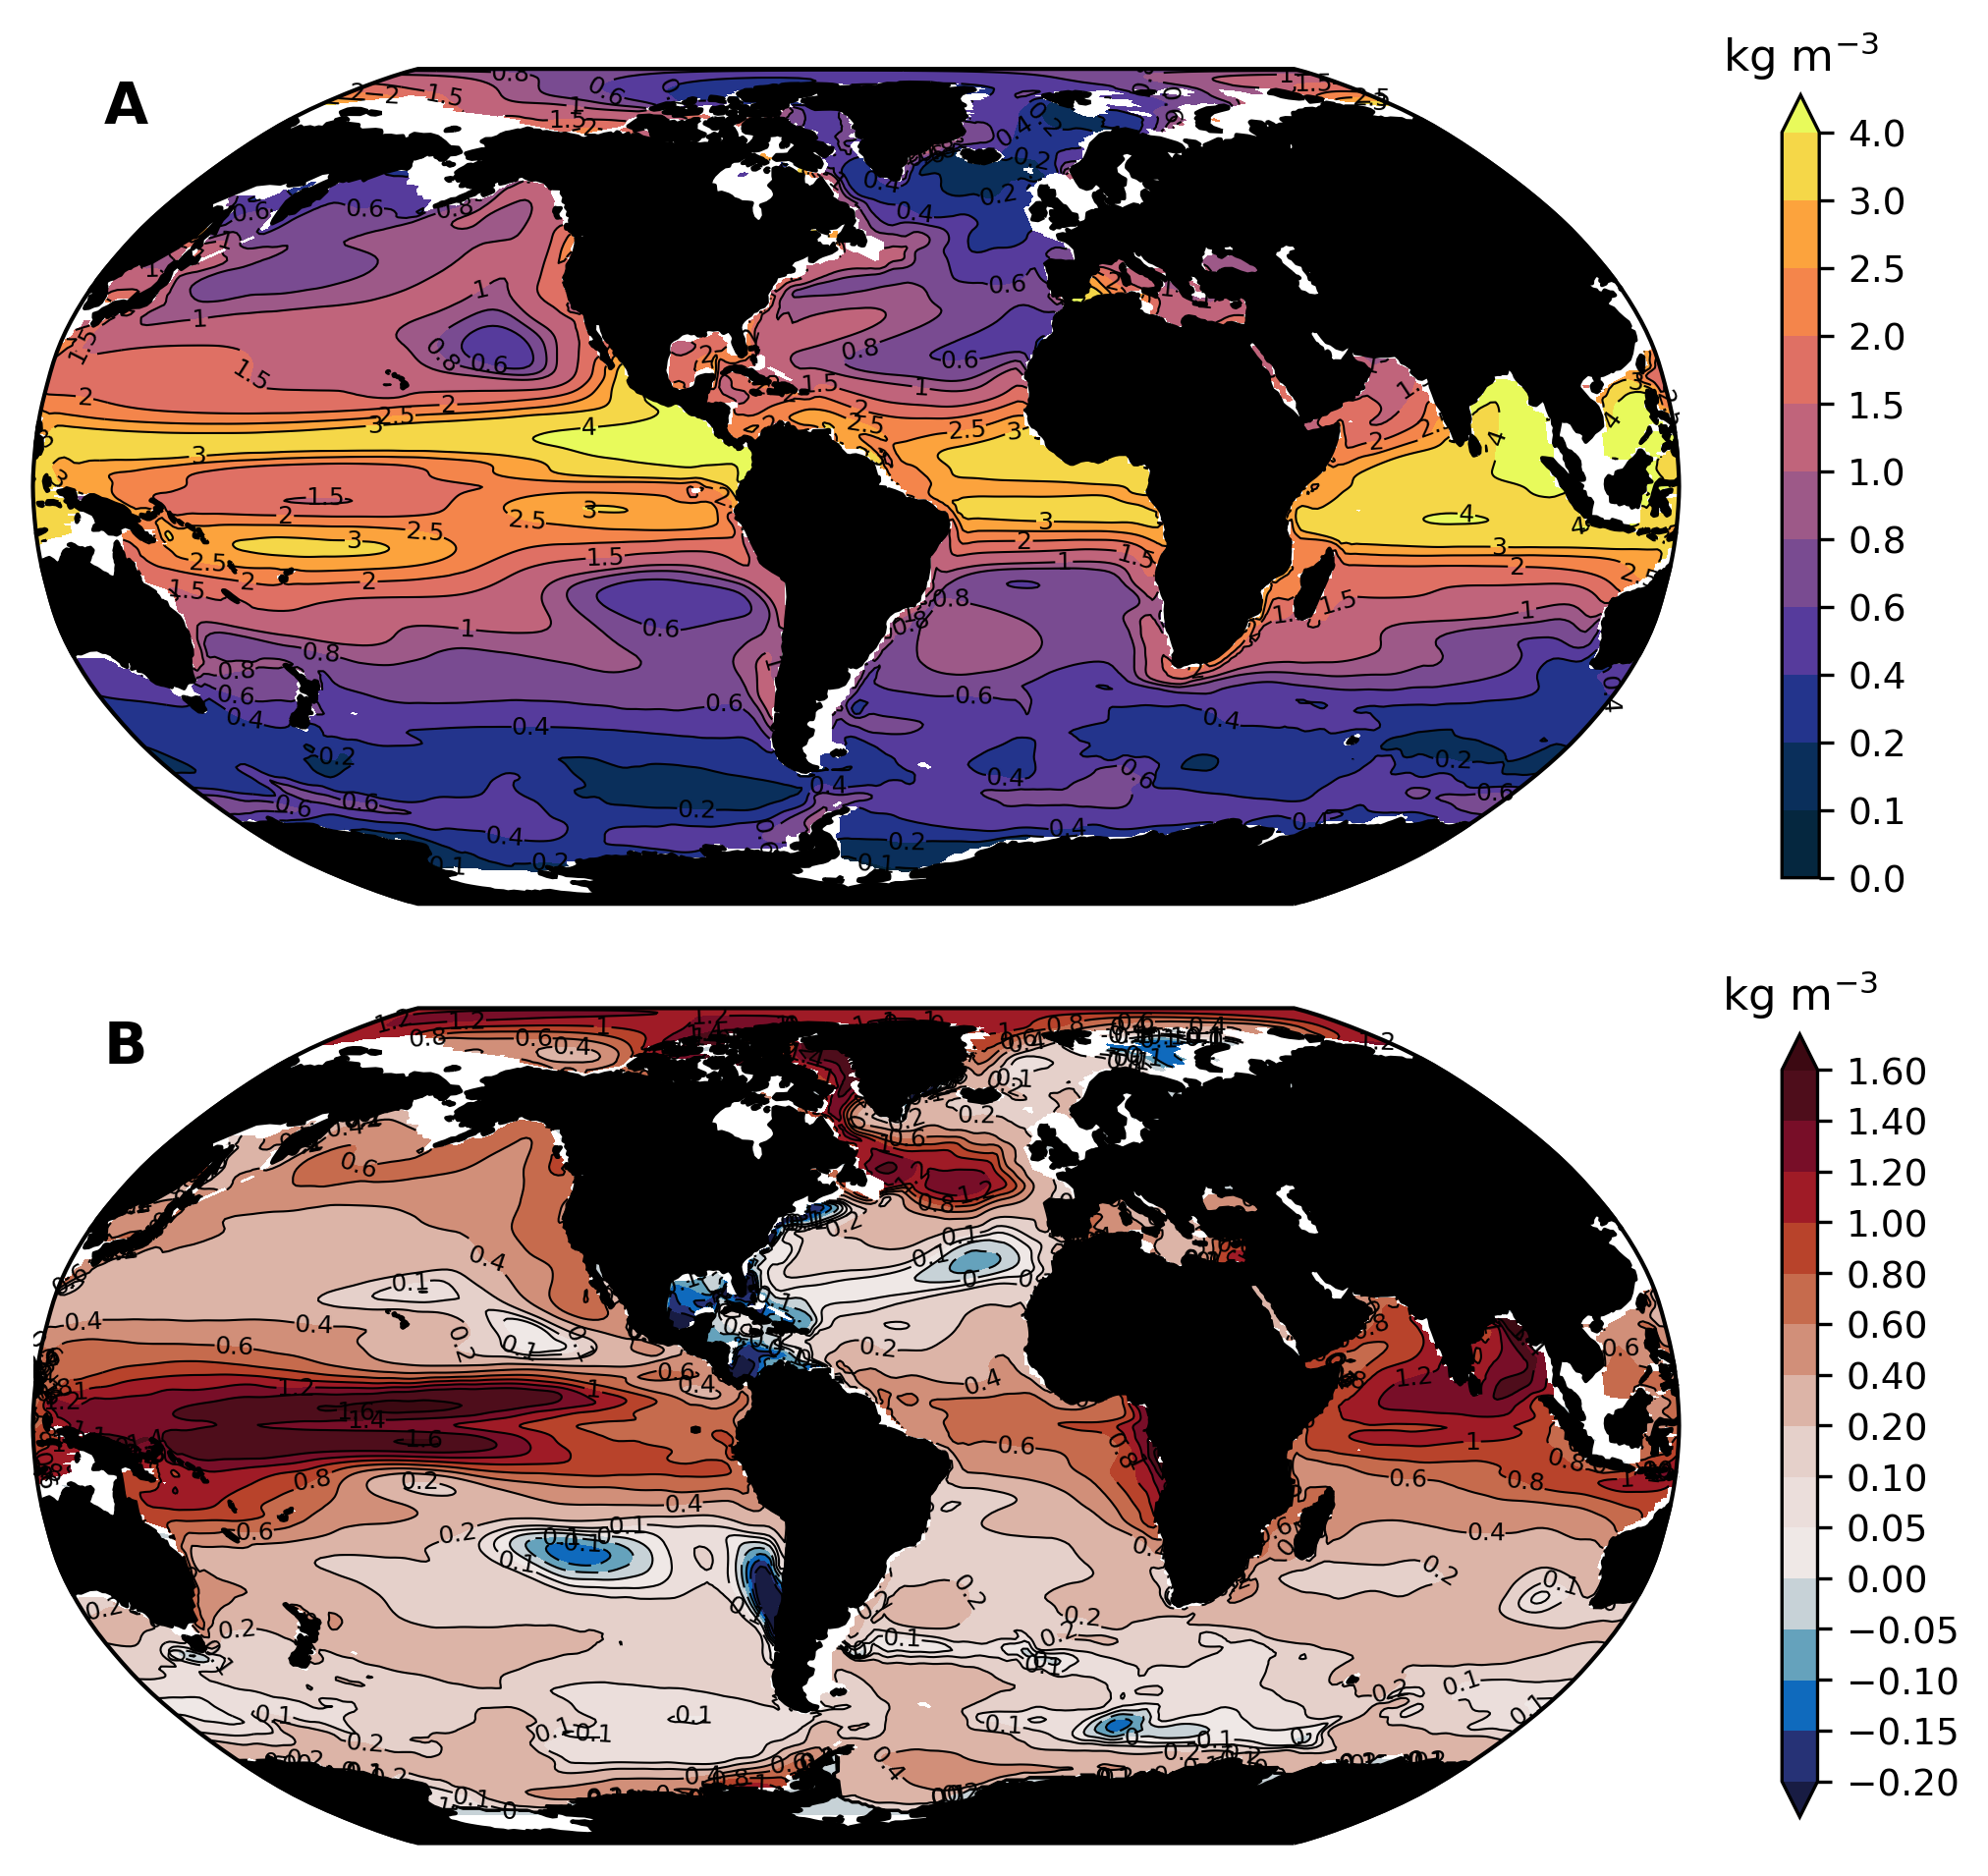

In [10]:
plot_name = os.path.join(diro['fig'],'cesm-stratification.pdf')


matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'


fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(2,1)

units = 'kg m$^{-3}$'

obj = [[]]*2
ax = []
for i,z in enumerate(Z):
    if i == 0:
        levels = [0.,0.1,0.2,0.4,0.6,0.8,1.,1.5,2.,2.5,3.,4.]
        norm = plot_tools.MidPointNorm(midpoint=1.0)
        contour_specs = {'levels':levels,'cmap':cmocean.cm.thermal ,'extend':'max','norm':norm}
    else:
        levels = [-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.2,0.4,0.6,0.8,1.,1.2,1.4,1.6]
        norm = plot_tools.MidPointNorm(midpoint=0)
        contour_specs = {'levels':levels,'cmap':cmocean.cm.balance,'norm':norm,'extend':'both'}
          
    obj[i] = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                   contour_specs,
                                                   units = units,
                                                   fig=fig,
                                                   gridspec=gs,
                                                   row=i,col=0)
    ax.append(obj[i]['ax'])

gridspec_kwargs = {'hspace' : -0.1,
                   'wspace' : 0.05,
                   'left' : 0.,
                   'right' : 0.87,
                   'bottom' : 0.,
                   'top' : 1.}
fgsz = plot_tools.plotgrid(fig, gs, ax, [2,1],gridspec_kwargs)

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.08
    fig.text(0.03,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
plt.savefig(plot_name,dpi=300,bbox_inches='tight')